In [1]:
from simforest import SimilarityTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, load_iris, make_classification
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'simforest'

In [4]:
X, y = make_classification(n_features=4, n_redundant=2, n_informative=2, n_samples=1000,
                           random_state=1, n_clusters_per_class=1, n_classes=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

In [5]:
params = {
    'n_trees': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
sf = GridSearchCV(SimilarityForestClassifier(),
                  param_grid=params, cv=5)

sf.fit(X_train, y_train)
sf_pred = sf.predict(X_test)

In [6]:
print(f'Similarity Forest accuracy score: {accuracy_score(y_test, sf_pred)}')

Similarity Forest accuracy score: 0.8733333333333333


In [7]:
sf.best_params_

{'n_trees': 60}

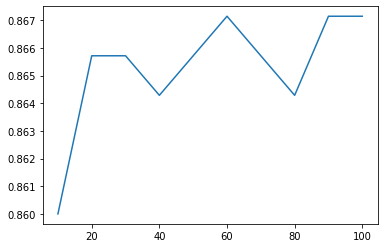

In [9]:
plt.plot(range(10,110,10), sf.cv_results_['mean_test_score'])

In [10]:
params = {
    'n_directions': [1, 2, 3, 4]
}
sf_dir = GridSearchCV(SimilarityForestClassifier(n_trees=60),
                  param_grid=params, cv=5)

sf_dir.fit(X_train, y_train)
sf_dir_pred = sf_dir.predict(X_test)

In [11]:
print(f'Similarity Forest accuracy score: {accuracy_score(y_test, sf_dir_pred)}')

Similarity Forest accuracy score: 0.87


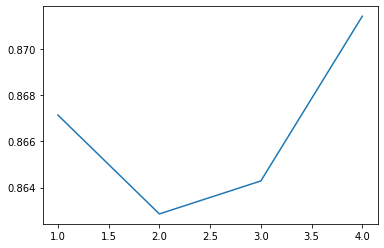

In [12]:
plt.plot(range(1,5,1), sf_dir.cv_results_['mean_test_score'])

In [13]:
sf_dir.best_estimator_

SimilarityForestClassifier(n_directions=4, n_trees=60, random_state=1,
                           sim_function=<built-in function dot>)